<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Discretización por Arboles de decisión </font> </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Data/dataKmeans.csv')

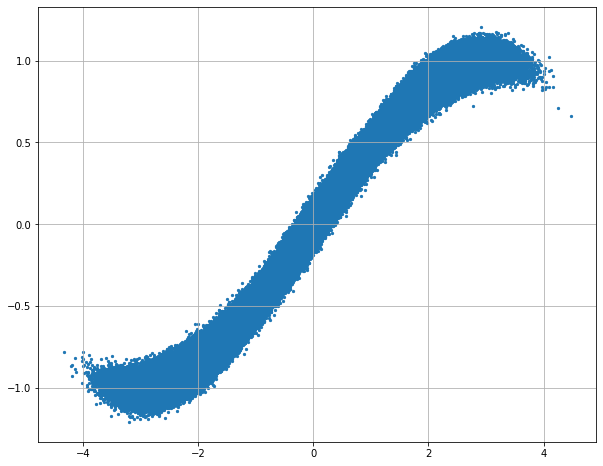

In [2]:
plt.figure(figsize=(10,8))
plt.scatter(df.x, df.y, s=5)
plt.grid()
plt.show()

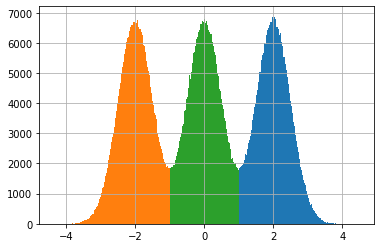

In [3]:
# Discretización por Kmeans
k=3
ctr = np.random.uniform(df.x.min(), df.x.max(),k)
ctr_anterior=np.ones(k)*np.inf
eps = 1e-6
while(np.abs(ctr - ctr_anterior).sum()>eps):
    dif=[]
    for c_i in ctr:
        dif.append(np.abs(c_i - df[['x']].values))
    distancias = np.concatenate(dif,axis=1)
    grupos = np.argmin(distancias, axis=1)
    df_copia = df.copy()
    df_copia['kmeans']=grupos
    ctr_anterior = ctr.copy()
    ctr = df_copia.groupby('kmeans')['x'].mean().values

df['kmeans'] = grupos
df.groupby('kmeans')['x'].hist(bins='auto')

# Modelo con datos discretizados con K-means
lin_kmeans=LinearRegression()
x = ctr.reshape(-1,1)
y = df.groupby('kmeans')['y'].mean()
lin_kmeans.fit(x,y)
predict_kmeans=lin_kmeans.predict(df[['x']].values)


In [4]:
# Modelo con datos sin discretizar
lin_SD = LinearRegression()
lin_SD.fit(df[['x']], df['y'])
predict_SD = lin_SD.predict(df[['x']])

In [5]:
df.head()

,x,y,kmeans
0,-1.905967,-0.780757,1
1,-2.934568,-0.955310,1
2,-2.178603,-0.960997,1
3,-1.870977,-0.791746,1
4,-2.513686,-0.968655,1


---
# Discretización por Árboles de decisión

In [6]:
from sklearn.tree import DecisionTreeRegressor,plot_tree  # Discretización por árboles de decisión
from sklearn.preprocessing import KBinsDiscretizer        # Discretización por ancho y frecuencia constantes y kmeans

In [7]:
nodes=3
disc_tree = DecisionTreeRegressor(max_leaf_nodes = nodes )
disc_tree.fit(df[['x']], df['y'])
df['tree'] = disc_tree.predict(df[['x']])

In [8]:
df.head()

,x,y,kmeans,tree
0,-1.905967,-0.780757,1,-0.611341
1,-2.934568,-0.955310,1,-0.611341
2,-2.178603,-0.960997,1,-0.611341
3,-1.870977,-0.791746,1,-0.611341
4,-2.513686,-0.968655,1,-0.611341


In [9]:
df['tree'].unique(),df['tree'].nunique()

(array([-0.6113408 ,  0.19537379,  0.82473443]), 3)

In [10]:
x = df.groupby('tree')['x'].mean().values.reshape(-1,1)

In [11]:
x

array([[-1.47276348],
       [ 0.39771337],
       [ 2.02418577]])

In [12]:
lin_tree = LinearRegression()
lin_tree.fit(x, df['tree'].unique())
predict_tree = lin_tree.predict(df[['x']].values)


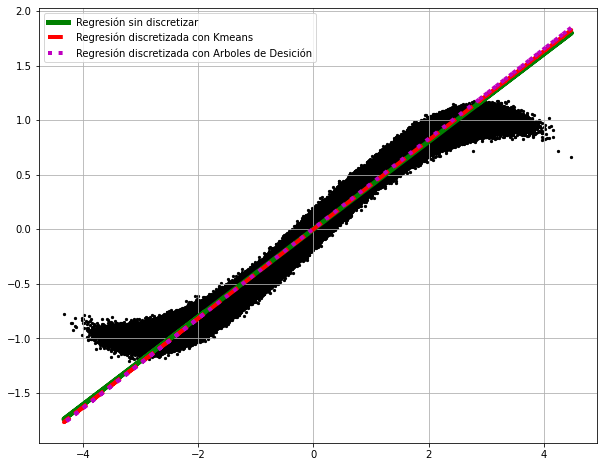

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(df.x, df.y, s=5, c='k')
plt.plot(df.x, predict_SD, 'g', lw=5, label='Regresión sin discretizar')
plt.plot(df.x, predict_kmeans, '--r', lw=4, label='Regresión discretizada con Kmeans')
plt.plot(df.x, predict_tree, ':m', lw=4, label='Regresión discretizada con Arboles de Desición')
plt.legend()
plt.grid()

In [14]:
#Coeficientes del modelo sin discretizar
lin_SD.coef_, lin_SD.intercept_

(array([0.40165508]), 0.0001864860861957386)

In [15]:
#Coeficientes del modelo con discretización Kmeans
lin_kmeans.coef_, lin_kmeans.intercept_

(array([0.40786998]), 0.0001852183640434627)

In [16]:
#Coeficientes del modelo con discretización Kmeans
lin_tree.coef_, lin_tree.intercept_

(array([0.41117747]), 0.006168076742431)

In [17]:
df['tree'].unique()

array([-0.6113408 ,  0.19537379,  0.82473443])

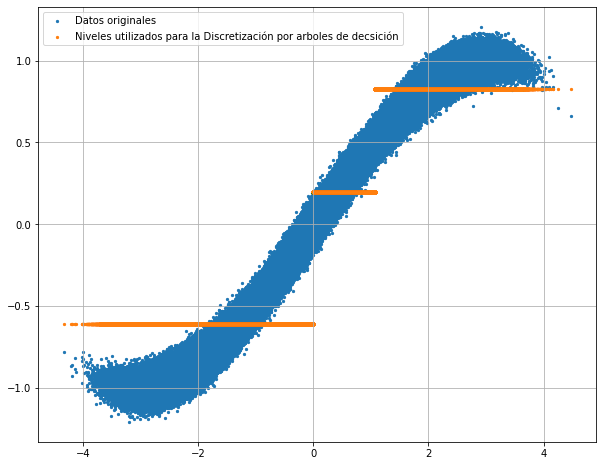

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(df.x,df.y, s=5, label = 'Datos originales')
plt.scatter(df.x,df.tree, s=5, label='Niveles utilizados para la Discretización por arboles de decsición')
plt.legend()
plt.grid()
plt.show()

In [19]:
df['x']

0         -1.905967
1         -2.934568
2         -2.178603
3         -1.870977
4         -2.513686
             ...   
1499995    1.983445
1499996    1.251872
1499997    2.066690
1499998    2.224125
1499999    2.862317
Name: x, Length: 1500000, dtype: float64

[Text(133.92000000000002, 181.2, 'X[0] <= -0.007\nmse = 0.478\nsamples = 1500000\nvalue = 0.0'),
 Text(66.96000000000001, 108.72, 'mse = 0.106\nsamples = 746770\nvalue = -0.611'),
 Text(200.88000000000002, 108.72, 'X[0] <= 1.071\nmse = 0.108\nsamples = 753230\nvalue = 0.607'),
 Text(133.92000000000002, 36.23999999999998, 'mse = 0.021\nsamples = 261030\nvalue = 0.195'),
 Text(267.84000000000003, 36.23999999999998, 'mse = 0.017\nsamples = 492200\nvalue = 0.825')]

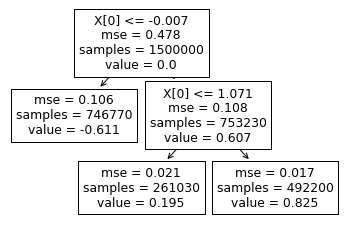

In [20]:
plot_tree(disc_tree)

In [21]:
df['tree_clusters']=1

In [26]:
df['tree_clusters'][df['x']<=-0.007] = 0

C:\Users\uie70742\AppData\Local\Temp/ipykernel_46408/33493355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tree_clusters'][df['x']<=-0.007] = 0


In [27]:
df.head()

,x,y,kmeans,tree,tree_clusters
0,-1.905967,-0.780757,1,-0.611341,0
1,-2.934568,-0.955310,1,-0.611341,0
2,-2.178603,-0.960997,1,-0.611341,0
3,-1.870977,-0.791746,1,-0.611341,0
4,-2.513686,-0.968655,1,-0.611341,0


In [28]:
df['tree_clusters'][(df['x']>-0.007) & (df['x']<=1.071)] = 1

C:\Users\uie70742\AppData\Local\Temp/ipykernel_46408/3314532048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tree_clusters'][(df['x']>-0.007) & (df['x']<=1.071)] = 1


In [29]:
df['tree_clusters'][(df['x']>1.071)] = 2

C:\Users\uie70742\AppData\Local\Temp/ipykernel_46408/1076004756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tree_clusters'][(df['x']>1.071)] = 2


In [30]:
df['tree_clusters'].uniqueque()

array([0, 1, 2], dtype=int64)

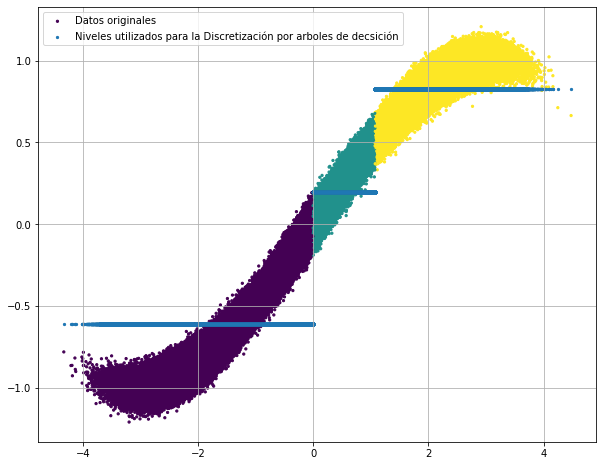

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(df.x,df.y, s=5, c = df['tree_clusters'] , label = 'Datos originales')
plt.scatter(df.x,df.tree, s=5, label='Niveles utilizados para la Discretización por arboles de decsición')
plt.legend()
plt.grid()
plt.show()

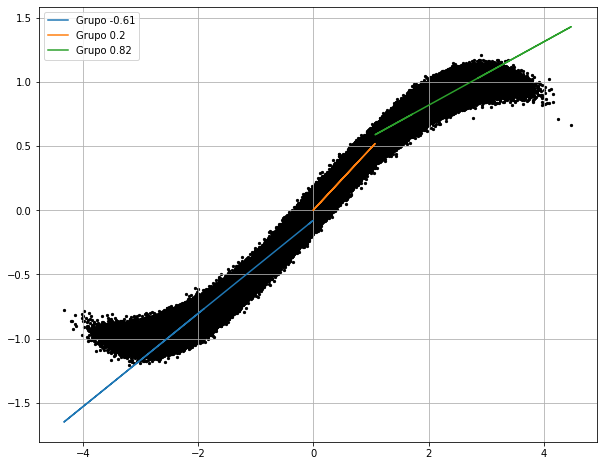

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(df.x, df.y, s=5, c='k')
for h_i in df['tree'].unique():
    x = df[df['tree']==h_i][['x']]
    y = df[df['tree']==h_i][['y']]
    
    lin_model = LinearRegression()
    lin_model.fit(x.values, y.values)
    predict_lin = lin_model.predict(x)
    plt.plot(x.values, predict_lin, label = f'Grupo {round(h_i,2)}')
plt.legend()
plt.grid()
    
    

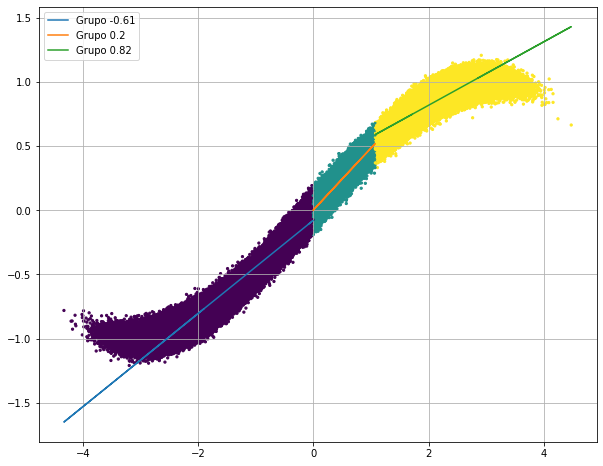

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(df.x, df.y, s=5, c = df['tree_clusters'])
for h_i in df['tree'].unique():
    x = df[df['tree']==h_i][['x']]
    y = df[df['tree']==h_i][['y']]
    
    lin_model = LinearRegression()
    lin_model.fit(x.values, y.values)
    predict_lin = lin_model.predict(x)
    plt.plot(x.values, predict_lin, label = f'Grupo {round(h_i,2)}')
plt.legend()
plt.grid()